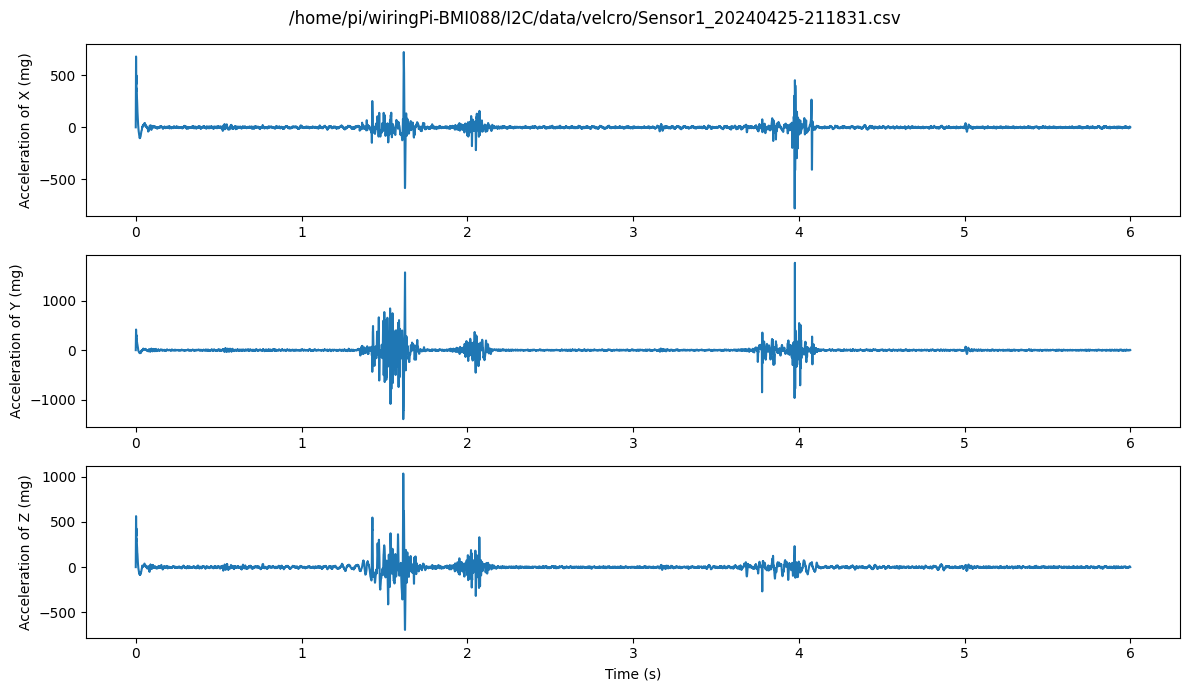

[2582]
1034.0591969345899


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import find_peaks

def butter_lowpass(cutoff, fs, order=5):
    return signal.butter(order, cutoff, fs=fs, btype='low', analog=False)

def butter_lowpass_filter(data, cutoff, fs, order=5):
    b, a = butter_lowpass(cutoff, fs, order=order)
    y = signal.lfilter(b, a, data)
    return y

def butter_highpass(cutoff, fs, order=5):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = signal.butter(order, normal_cutoff, btype='high', analog=False)
    return b, a

def butter_highpass_filter(data, cutoff, fs, order=5):
    b, a = butter_highpass(cutoff, fs, order=order)
    y = signal.filtfilt(b, a, data)
    return y
def peak_check(filename):
    
    df = pd.read_csv(filename)
    ACC_Z = df.iloc[:, 2]
    
    fs = 1600
    time = np.arange(len(ACC_Z)) / fs

    # Filter requirements.
    order = 6
    cutoff = 500  # desired cutoff frequency of the filter, Hz
    
    # Filter the data, and plot both the original and filtered signals.
    ACC_Z_filtered = butter_lowpass_filter(ACC_Z, cutoff, fs, order)
    ACC_Z_filtered = butter_highpass_filter(ACC_Z_filtered, 20, fs, order=5)
    threshold = 1000
    peaks, _ = find_peaks(ACC_Z_filtered, height=threshold)
    if len(peaks) == 0:
        print(f"{filename}")
    print(peaks)
    print(ACC_Z_filtered[2582])

def plot_data(filename):
    
    df = pd.read_csv(filename)
    ACC_X = df.iloc[:, 0]
    ACC_Y = df.iloc[:, 1]
    ACC_Z = df.iloc[:, 2]
    
    fs = 1600
    time = np.arange(len(ACC_X)) / fs

    # Filter requirements.
    order = 6
    cutoff = 500  # desired cutoff frequency of the filter, Hz
    
    # Filter the data, and plot both the original and filtered signals.
    ACC_X_filtered = butter_lowpass_filter(ACC_X, cutoff, fs, order)
    ACC_Y_filtered = butter_lowpass_filter(ACC_Y, cutoff, fs, order)
    ACC_Z_filtered = butter_lowpass_filter(ACC_Z, cutoff, fs, order)
    ACC_X_filtered = butter_highpass_filter(ACC_X_filtered, 20, fs, order=5)
    ACC_Y_filtered = butter_highpass_filter(ACC_Y_filtered, 20, fs, order=5)
    ACC_Z_filtered = butter_highpass_filter(ACC_Z_filtered, 20, fs, order=5)
    
    # 创建一个包含三个子图的画布
    fig, axes = plt.subplots(3, 1, figsize=(12, 7)) 
    irange = 5000
    ylim = False
    # axes[0].set_title('ACC_X')
    # axes[1].set_title('ACC_Y')
    # axes[2].set_title('ACC_Z')
    axes[0].set_ylabel("Acceleration of X (mg)")
    axes[1].set_ylabel("Acceleration of Y (mg)")
    axes[2].set_ylabel("Acceleration of Z (mg)")
    axes[2].set_xlabel("Time (s)")
    # for axe in axes:
    #     if ylim :axe.set_ylim(-irange, irange)
    #     axe.set_ylabel('mg')
    
        
    
    axes[0].plot(time,ACC_X_filtered)
    axes[1].plot(time,ACC_Y_filtered)
    axes[2].plot(time,ACC_Z_filtered)


    plt.suptitle(filename)
    plt.tight_layout()
    # plt.savefig("visualization.png")
    plt.show()


# label_df = pd.read_csv("../I2C/data/velcro_test_label.csv")
# file_list = label_df['FilePath'].values
# print(len(file_list))
# for i, file_name in enumerate(file_list):
#     df = pd.read_csv(file_name)
#     peak_check(file_name)

plot_data('/home/pi/wiringPi-BMI088/I2C/data/velcro/Sensor1_20240425-211831.csv')
peak_check('/home/pi/wiringPi-BMI088/I2C/data/velcro/Sensor1_20240425-211831.csv')

In [11]:
# 用于检查一下
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.signal as signal
from scipy.signal import find_peaks

def peak_check(filename):
    
    df = pd.read_csv(filename)
    ACC_Z = df.iloc[:, 2]
    
    fs = 1600
    time = np.arange(len(ACC_Z)) / fs

    # Filter requirements.
    order = 6
    cutoff = 500  # desired cutoff frequency of the filter, Hz
    
    # Filter the data, and plot both the original and filtered signals.
    ACC_Z_filtered = butter_lowpass_filter(ACC_Z, cutoff, fs, order)
    ACC_Z_filtered = butter_highpass_filter(ACC_Z_filtered, 20, fs, order=5)
    threshold = 1000
    peaks, _ = find_peaks(ACC_Z_filtered, height=threshold)
    if peaks[0] > 3000:
        print(f"{filename}")
        print(peaks[0])
        return peaks[0]
    # print(ACC_Z_filtered[2582])
    else:
        return 0
def plot_data(filename):
    
    df = pd.read_csv(filename)
    ACC_X = df.iloc[:, 0]
    ACC_Y = df.iloc[:, 1]
    ACC_Z = df.iloc[:, 2]
    
    fs = 1600
    time = np.arange(len(ACC_X)) / fs
    
    # 创建一个包含三个子图的画布
    fig, axes = plt.subplots(3, 1, figsize=(12, 7)) 
    irange = 5000
    ylim = False
    axes[0].set_ylabel("Acceleration of X (mg)")
    axes[1].set_ylabel("Acceleration of Y (mg)")
    axes[2].set_ylabel("Acceleration of Z (mg)")
    axes[2].set_xlabel("Time (s)")
    
    axes[0].plot(time,ACC_X)
    axes[1].plot(time,ACC_Y)
    axes[2].plot(time,ACC_Z)


    plt.suptitle(filename)
    plt.tight_layout()
    # plt.savefig("visualization.png")
    plt.show()

label_df = pd.read_csv("../data/white_cup_user1_label.csv")
file_list = label_df['FilePath'].values
# print(len(file_list))
count = 0
a = []
for i, file_name in enumerate(file_list):
    df = pd.read_csv(file_name)
    result = peak_check(file_name)
    if result:
        a.append(result)

print(a)
        
        
        
    
print('count',count)


/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_140629.csv
3529
/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_140739.csv
3309
/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_140800.csv
3465
/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_141014.csv
3053
/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_141109.csv
3010
/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_141217.csv
3028
/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_141657.csv
3424
/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_141719.csv
3273
/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_142316.csv
3681
/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_142401.csv
3384
/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_142422.csv
3344
/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_143007.csv
3349
/home/pi/prosthetic-intelligence/data/white_cup_user

In [ ]:
# plot_data('/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_140629.csv')
# peak_check('/home/pi/prosthetic-intelligence/data/white_cup_user1/20240112_140629.csv')
